In [1]:
from minisom import MiniSom
from numpy import zeros
import numpy as np

In [2]:
#from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_iris

In [3]:
import time

In [17]:
som_grid_rows = 10
som_grid_columns = 10
iterations = 50
sigma = 3
learning_rate = 0.1

In [30]:
data, target = load_iris(True)
#print(target)

In [19]:
#sigma is radius
som = MiniSom(x=som_grid_rows,y=som_grid_columns,input_len=data.shape[1],learning_rate=learning_rate,sigma=sigma)

In [20]:
som.random_weights_init(data)

In [21]:
start_time = time.time()
# training with 100 iterations
som.train_random(data,iterations) 
elapsed_time = time.time() - start_time
print('Total training time: ',elapsed_time)

Total training time:  0.10294604301452637


In [22]:
#testing new data point
test = np.random.randint(10)
for i in range(10):
    test = np.random.randint(10)
    #print(data[test])
    print(som.winner(data[test]))

(0, 9)
(0, 7)
(0, 9)
(0, 9)
(0, 9)
(0, 9)
(0, 6)
(0, 6)
(0, 6)
(0, 7)


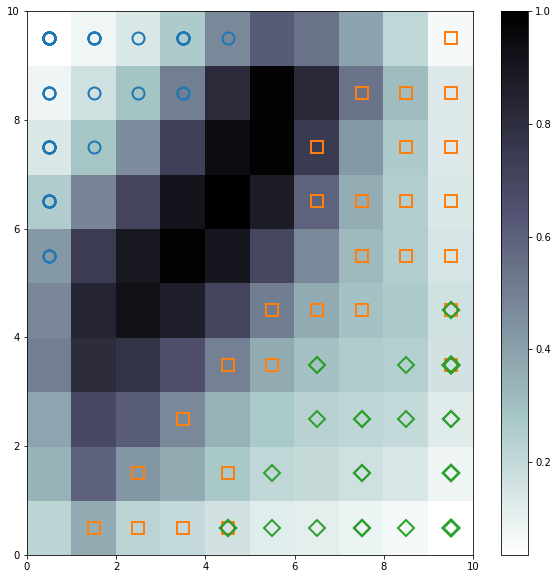

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
# Plotting the response for each pattern in the iris dataset
plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
plt.colorbar()

t = np.zeros(len(target), dtype=int)
t[target == 0] = 0
t[target == 1] = 1
t[target == 2] = 2

# use different colors and markers for each label
markers = ['o', 's', 'D']
colors = ['C0', 'C1', 'C2']
for cnt, xx in enumerate(data):
    #print(cnt)
    w = som.winner(xx)  # getting the winner
    # place a marker on the winning position for the sample xx
    #print(colors[t[cnt]])
    plt.plot(w[0]+.5, w[1]+.5, markers[t[cnt]], markerfacecolor='None',
             markeredgecolor=colors[t[cnt]], markersize=12, markeredgewidth=2)
plt.axis([0, 10, 0, 10])
plt.savefig('iris.png')
plt.show()

dict_items([((0, 9), Counter({0: 15})), ((3, 9), Counter({0: 6})), ((0, 6), Counter({0: 6})), ((0, 7), Counter({0: 6})), ((2, 9), Counter({0: 1})), ((0, 8), Counter({0: 3})), ((1, 7), Counter({0: 1})), ((0, 5), Counter({0: 3})), ((3, 8), Counter({0: 2})), ((1, 9), Counter({0: 4})), ((2, 8), Counter({0: 1})), ((1, 8), Counter({0: 1})), ((4, 9), Counter({0: 1})), ((9, 8), Counter({1: 3})), ((2, 1), Counter({1: 3})), ((8, 6), Counter({1: 1})), ((9, 5), Counter({1: 2})), ((9, 6), Counter({1: 4})), ((6, 4), Counter({1: 4})), ((3, 2), Counter({1: 2})), ((6, 6), Counter({1: 1})), ((9, 7), Counter({1: 4})), ((3, 0), Counter({1: 1})), ((1, 0), Counter({1: 1})), ((9, 9), Counter({1: 3})), ((4, 1), Counter({1: 1})), ((8, 7), Counter({1: 3})), ((4, 0), Counter({2: 3, 1: 2})), ((9, 4), Counter({2: 2, 1: 1})), ((8, 5), Counter({1: 1})), ((8, 8), Counter({1: 2})), ((5, 3), Counter({1: 1})), ((7, 8), Counter({1: 1})), ((9, 3), Counter({2: 13, 1: 1})), ((2, 0), Counter({1: 1})), ((7, 6), Counter({1: 1}

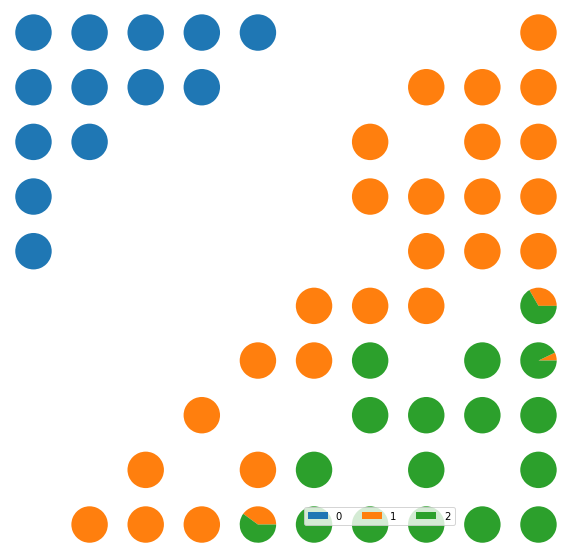

In [41]:
from matplotlib.gridspec import GridSpec
label = target
labels_map = som.labels_map(data, label)
label_names = np.unique(label)

plt.figure(figsize=(30, 30))
the_grid = GridSpec(30, 30)

print(labels_map.items())

for position in labels_map.keys():
    label_fracs = [labels_map[position][l] for l in label_names]
    plt.subplot(the_grid[9-position[1], position[0]], aspect=1)
    patches, texts = plt.pie(label_fracs)
plt.legend(patches, label_names, bbox_to_anchor=(0, 1), ncol=3)
plt.savefig('iris_cluster.png')
plt.show()